In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import seaborn as sns
import os
import cv2

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report
from sklearn.model_selection import train_test_split

In [51]:
# Define os caminhos para os dados de treino e teste
caminho_dados_treino = './Treinamento/'
caminho_dados_teste = './Teste/'

# Obtém a lista de categorias (classes) do diretório de treino
categorias = os.listdir(caminho_dados_treino)

# Exibe as classes
for categoria in categorias:
    os.listdir(os.path.join(caminho_dados_treino, categoria))
    
# Define um dicionário para mapear as classes para rótulos numéricos
classes = {'tumor_glioma': 0, 'tumor_meningioma': 1, 'sem_tumor': 2, 'tumor_pituitária': 3}
classes

{'tumor_glioma': 0,
 'tumor_meningioma': 1,
 'sem_tumor': 2,
 'tumor_pituitária': 3}

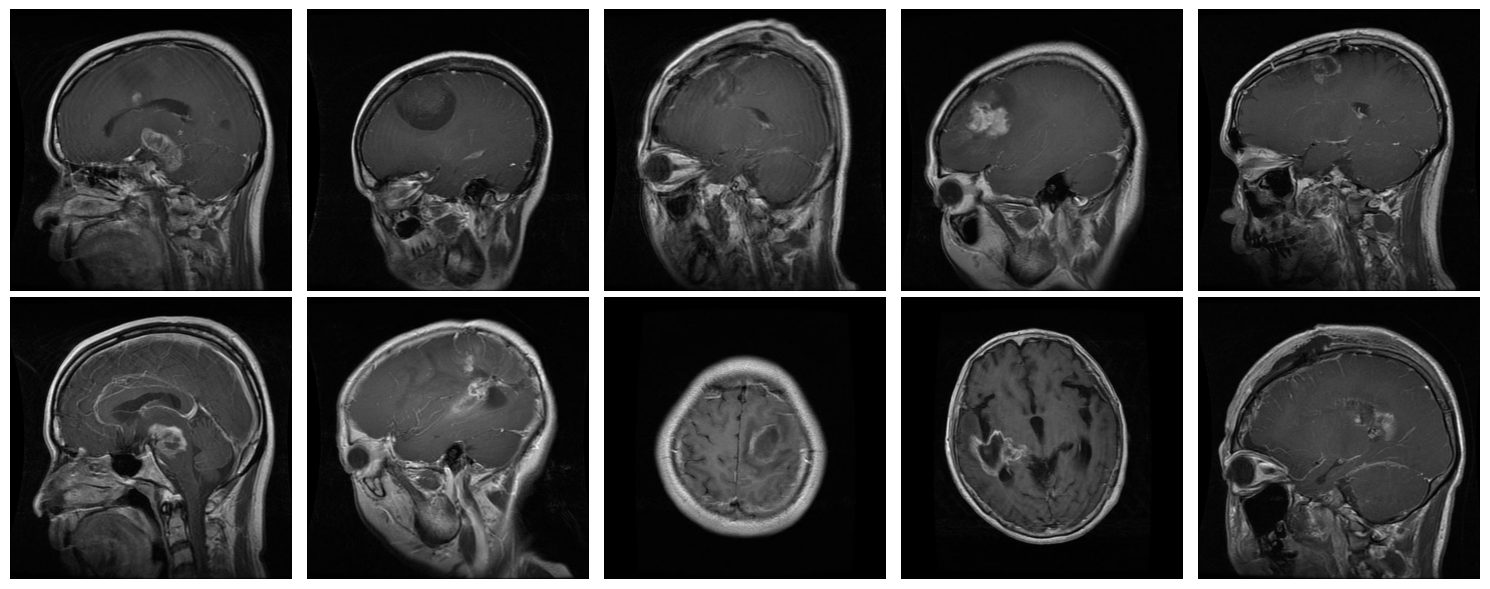

In [52]:
# Visualiza imagens aleatórias de uma classe específica (tumor_glioma)
caminho_imagem = './Treinamento/tumor_glioma/'
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
indices_aleatorios = random.sample(range(1, 101), 10)

for i, idx in enumerate(indices_aleatorios, 1):
    caminho_arquivo = os.path.join(caminho_imagem, f'gg ({idx}).jpg')
    imagem = Image.open(caminho_arquivo)
    linha_subplot = (i - 1) // 5
    coluna_subplot = (i - 1) % 5
    axes[linha_subplot, coluna_subplot].imshow(imagem)
    axes[linha_subplot, coluna_subplot].axis('off')  
plt.tight_layout()   
plt.show()

In [64]:
# Carrega imagens do conjunto de treino
X = []
Y = []

for classe in classes:
    caminho_classe = caminho_dados_treino + '//' + classe
    for arquivo in os.listdir(caminho_classe):
        imagem = cv2.imread(caminho_classe + '//' + arquivo, 0)
        imagem = cv2.resize(imagem, (200, 200))
        X.append(imagem)
        Y.append(classes[classe])

Tamanho do conjunto de treino:  2870


In [65]:
# Carrega imagens do conjunto de teste
for classe in classes:
    caminho_classe = caminho_dados_teste + '//' + classe
    for arquivo in os.listdir(caminho_classe):
        imagem = cv2.imread(caminho_classe + '//' + arquivo, 0)
        imagem = cv2.resize(imagem, (200, 200))
        X.append(imagem)
        Y.append(classes[classe])

Tamanho do conjunto de teste:  3264


In [60]:
# Converte os dados para arrays numpy
X = np.array(X)
Y = np.array(Y)

# Exibe a contagem de cada classe no conjunto de dados
pd.Series(Y).value_counts()

1    937
0    926
3    901
2    500
Name: count, dtype: int64

In [ ]:
# Reformula os dados
X_atualizado = X.reshape(len(X), -1)
X_atualizado.shape

In [ ]:
# Divide os dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_atualizado, Y, random_state=10, test_size=0.20)

In [ ]:
# Visualiza a distribuição das classes nos conjuntos de treino e teste
plt.figure(figsize=(15, 4))
nomes = ['Dados de treino', 'Dados de teste']
for i, j in enumerate([y_treino, y_teste]):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=j, alpha=0.4)
    plt.xlabel(nomes[i])

In [ ]:
# Reformula os dados de treino e teste
X_treino_atualizado = X_treino.reshape(len(X_treino), -1)
X_teste_atualizado = X_teste.reshape(len(X_teste), -1)
X_treino_atualizado.shape, X_teste_atualizado.shape

In [66]:
# Normaliza os valores dos pixels para o intervalo [0, 1]

# Imprime os valores máximos e mínimos antes da normalização para os dados de treino
print("Valores máximos e mínimos antes da normalização (dados de treino):")
print(X_treino_atualizado.max(), X_treino_atualizado.min())

# Imprime os valores máximos e mínimos antes da normalização para os dados de teste
print(X_teste_atualizado.max(), X_teste_atualizado.min())

# Normaliza os valores dos pixels dividindo por 255 (valor máximo possível para um pixel)
X_treino_atualizado = X_treino_atualizado / 255
X_teste_atualizado = X_teste_atualizado / 255

# Imprime os valores máximos e mínimos após a normalização para os dados de treino
print("Valores máximos e mínimos após a normalização (dados de treino):")
print(X_treino_atualizado.max(), X_treino_atualizado.min())

# Imprime os valores máximos e mínimos após a normalização para os dados de teste
print(X_teste_atualizado.max(), X_teste_atualizado.min())


Valores máximos e mínimos antes da normalização (dados de treino):
1.0 0.0
1.0 0.0
Valores máximos e mínimos após a normalização (dados de treino):
0.00392156862745098 0.0
0.00392156862745098 0.0


In [ ]:
nomes = []
acuracias = []
resultados_finais = []

## algoritmo KNN 

In [67]:
# Treina um classificador K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)  # Cria um modelo KNN com 3 vizinhos
knn.fit(X_treino_atualizado, y_treino)  # Treina o modelo com os dados de treino X_treino_atualizado e seus rótulos y_treino
y_predito = knn.predict(X_teste_atualizado)  # Faz previsões nos dados de teste X_teste_atualizado

# Avalia o desempenho do classificador
acuracia = accuracy_score(y_teste, y_predito)  # Calcula a acurácia comparando as previsões com os rótulos reais
CM_knn = confusion_matrix(y_teste, y_predito)  # Calcula a matriz de confusão

# Exibe os resultados
print("Acurácia : ", acuracia * 100, '%')  # Imprime a acurácia do modelo em porcentagem
RelatorioClassificacao = classification_report(y_teste, y_predito)  # Gera um relatório de classificação com métricas detalhadas
print('Relatório de Classificação : ', RelatorioClassificacao)

nome = 'KNN'
nomes.append(nome)
acuracias.append(acuracia)
resultados_finais.append((nome, acuracia))


Acurácia :  80.55130168453293 %
Relatório de Classificação :                precision    recall  f1-score   support

           0       0.74      0.87      0.80       184
           1       0.88      0.65      0.75       205
           2       0.73      0.72      0.72        95
           3       0.85      0.98      0.91       169

    accuracy                           0.81       653
   macro avg       0.80      0.80      0.80       653
weighted avg       0.81      0.81      0.80       653



In [ ]:
# Visualiza a matriz de confusão
sns.heatmap(CM_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

In [ ]:
# Lista para armazenar características e rótulos
caracteristicas = []
rotulos = []

# Percorre as classes
for categoria, rotulo in classes.items():
    caminho_categoria = os.path.join(caminho_dados_treino, categoria)
    
    # Percorre as imagens em cada classe
    for nome_arquivo in os.listdir(caminho_categoria):
        caminho_arquivo = os.path.join(caminho_categoria, nome_arquivo)
        
        # Abre a imagem usando OpenCV
        img = cv2.imread(caminho_arquivo)
        
        # Obtém características da imagem (por exemplo, largura e altura)
        largura, altura, _ = img.shape
        caracteristicas.append([largura, altura])
        
        # Adiciona o rótulo correspondente
        rotulos.append(rotulo)

# Converte as listas em arrays NumPy
caracteristicas = np.array(caracteristicas)
rotulos = np.array(rotulos)

In [ ]:
# Cria um DataFrame para facilitar a manipulação dos dados
df = pd.DataFrame(data={'Largura': caracteristicas[:, 0], 'Altura': caracteristicas[:, 1], 'Rotulo': rotulos})

In [ ]:
sns.pairplot(df, hue='Rotulo', palette='viridis')
plt.show()